In [1]:
import numpy as np
import pandas as pd

wine_red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

wine_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
# pandas의 float type 표기법 바꾸기 / 소수점 둘째 자리 까지 출력하도록 변경
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
# pd.reset_option('display.float_format')

In [3]:
# quality 값의 종류
wine_red['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [4]:
# quality 값을 0 또는 1로 변환 (이진화)
# quality가 5보다 크다면 1, 아니면 0
binary_data = wine_red.copy()

# apply 는 인자로 받은 lambda function 을 적용시켜주는 함수
binary_data['quality'] = binary_data['quality'].apply(lambda x: 1 if x>5 else 0)
binary_data.quality.value_counts()

quality
1    855
0    744
Name: count, dtype: int64

In [5]:
binary_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,0
1,7.80,0.88,0.00,2.60,0.10,25.00,67.00,1.00,3.20,0.68,9.80,0
2,7.80,0.76,0.04,2.30,0.09,15.00,54.00,1.00,3.26,0.65,9.80,0
3,11.20,0.28,0.56,1.90,0.07,17.00,60.00,1.00,3.16,0.58,9.80,1
4,7.40,0.70,0.00,1.90,0.08,11.00,34.00,1.00,3.51,0.56,9.40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.20,0.60,0.08,2.00,0.09,32.00,44.00,0.99,3.45,0.58,10.50,0
1595,5.90,0.55,0.10,2.20,0.06,39.00,51.00,1.00,3.52,0.76,11.20,1
1596,6.30,0.51,0.13,2.30,0.08,29.00,40.00,1.00,3.42,0.75,11.00,1
1597,5.90,0.65,0.12,2.00,0.07,32.00,44.00,1.00,3.57,0.71,10.20,0


In [6]:
# X: fixed acidity부터 alcohol
# y: 이진화한 quality
X = binary_data.iloc[:, :-1]
y = binary_data.iloc[:, -1]

In [7]:
# 데이터를 train set과 test set으로 나눔
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1199, 11) (1199,)
(400, 11) (400,)


In [8]:
# before scaling
x_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1199.00,1199.00,1199.00,1199.00,1199.00,1199.00,1199.00,1199.00,1199.00,1199.00,1199.00
mean,8.33,0.53,0.27,2.57,0.09,15.92,47.23,1.00,3.31,0.66,10.40
std,1.76,0.18,0.19,1.50,0.05,10.53,33.45,0.00,0.16,0.18,1.06
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40
25%,7.10,0.40,0.10,1.90,0.07,7.00,22.00,1.00,3.20,0.55,9.50
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.30,0.62,10.10
75%,9.20,0.64,0.42,2.60,0.09,21.00,63.50,1.00,3.40,0.73,11.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90


In [9]:
# standard scaler를 사용하여 scaling => 평균을 0, 표준편차를 1로 맞추는 scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
# after scaling
pd.DataFrame(x_train, columns=[binary_data.columns[:-1]]).describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1199.00,1199.00,1199.00,1199.00,1199.00,1199.00,1199.00,1199.00,1199.00,1199.00,1199.00
mean,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.12,-2.31,-1.40,-1.11,-1.62,-1.42,-1.23,-3.53,-3.62,-1.89,-1.89
25%,-0.70,-0.73,-0.88,-0.44,-0.39,-0.85,-0.75,-0.59,-0.68,-0.63,-0.85
50%,-0.24,-0.05,-0.06,-0.24,-0.17,-0.18,-0.28,-0.01,-0.04,-0.23,-0.28
75%,0.49,0.63,0.77,0.02,0.06,0.48,0.49,0.54,0.59,0.40,0.57
max,4.29,5.96,3.76,8.64,11.07,5.33,7.23,3.64,4.49,7.65,4.26


In [11]:
# scikit-learn의 Logistic Regression 모델을 사용하여 학습 및 예측
from sklearn.linear_model import LogisticRegression

LR_binary = LogisticRegression()
LR_binary.fit(x_train, y_train)
y_pred = LR_binary.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
f1_score = f1_score(y_pred, y_test)
confusion_mtx = confusion_matrix(y_pred, y_test)

print(f"accuracy: {accuracy}, recall: {recall}, precision: {precision}, f1_score: {f1_score}\n")
print("confusion matrix")
print(confusion_mtx)
print()
print("model의 weight")
print(LR_binary.coef_)

accuracy: 0.7525, recall: 0.7397260273972602, precision: 0.7941176470588235, f1_score: 0.7659574468085105

confusion matrix
[[139  42]
 [ 57 162]]

model의 weight
[[ 0.24506361 -0.53568588 -0.19162414  0.05018647 -0.23075784  0.15565943
  -0.53697529 -0.08387093 -0.02999525  0.46532351  0.88645649]]


Text(50.722222222222214, 0.5, 'true')

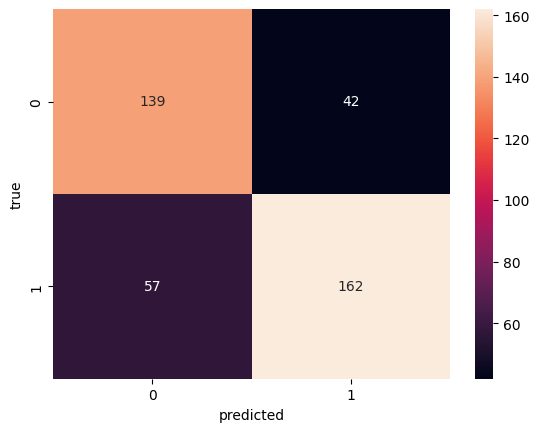

In [13]:
# 데이터 시각화 라이브러리 seaborn
# 설치: conda install seaborn 아니면 pip install seaborn
import seaborn as sb

fig = sb.heatmap(confusion_mtx, annot=True, fmt=".0f")
fig.set_xlabel('predicted')
fig.set_ylabel('true')

# Homework

In [14]:
from sklearn.datasets import load_digits

data_digits = load_digits()
X = data_digits.data
y = data_digits.target

print(X.shape, y.shape)

(1797, 64) (1797,)


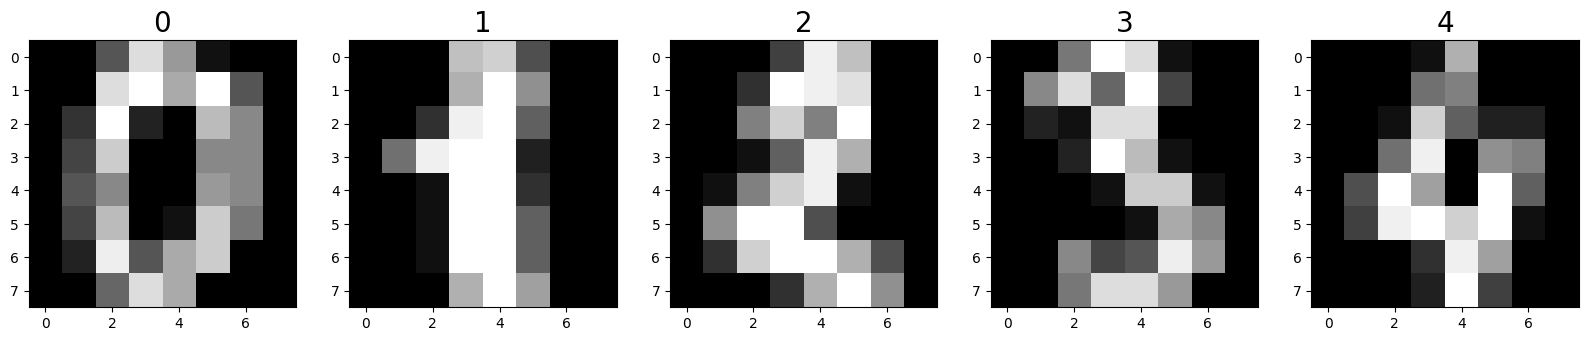

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(data_digits.data[0:5], 
                                           data_digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title(label, fontsize = 20)

### 여기서부터 과제

In [16]:
# 데이터를 train set과 test set으로 나누기
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1347, 64) (1347,)
(450, 64) (450,)


In [17]:
# standard scaler를 사용하여 scaling => 평균을 0, 표준편차를 1로 맞추는 scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
# scikit-learn의 Logistice Regression 모델 사용해서 학습 후 예측하기
from sklearn.linear_model import LogisticRegression

LR_binary = LogisticRegression()
LR_binary.fit(x_train, y_train)
y_pred = LR_binary.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_pred, y_test)
recall = recall_score(y_pred, y_test, average=None)
precision = precision_score(y_pred, y_test, average=None)
f1_score = f1_score(y_pred, y_test, average=None)
confusion_mtx = confusion_matrix(y_pred, y_test)

print(f"accuracy: {accuracy}, recall: {recall}, precision: {precision}, f1_score: {f1_score}\n")
print("confusion matrix")
print(confusion_mtx)
print()
print("model의 weight")
print(LR_binary.coef_)

accuracy: 0.9577777777777777, recall: [1.         0.95652174 1.         0.97777778 0.97727273 0.93617021
 0.97674419 0.97560976 0.94594595 0.86885246], precision: [1.         0.93617021 1.         0.97777778 0.93478261 0.91666667
 1.         0.95238095 0.92105263 0.94642857], f1_score: [1.         0.94623656 1.         0.97777778 0.95555556 0.92631579
 0.98823529 0.96385542 0.93333333 0.90598291]

confusion matrix
[[52  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  0  0  0  0  0  2  0]
 [ 0  0 34  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  0  1]
 [ 0  0  0  0 43  1  0  0  0  0]
 [ 0  0  0  1  0 44  0  0  1  1]
 [ 0  0  0  0  0  1 42  0  0  0]
 [ 0  0  0  0  1  0  0 40  0  0]
 [ 0  0  0  0  1  0  0  0 35  1]
 [ 0  3  0  0  1  2  0  2  0 53]]

model의 weight
[[ 0.00000000e+00 -3.46352221e-02 -7.11560253e-02  3.42050306e-01
   2.18627377e-02 -3.89148735e-01 -1.72746624e-01 -3.48653216e-02
  -4.44211959e-03 -8.99505451e-02 -8.84134151e-02  2.24187792e-01
   2.08806434e-01  2.74676016e-01 -1.1

In [20]:
# accuracy score, f1 score, confusion matrix 출력하기

print(accuracy, f1_score)
print(confusion_mtx)

0.9577777777777777 [1.         0.94623656 1.         0.97777778 0.95555556 0.92631579
 0.98823529 0.96385542 0.93333333 0.90598291]
[[52  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  0  0  0  0  0  2  0]
 [ 0  0 34  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  0  1]
 [ 0  0  0  0 43  1  0  0  0  0]
 [ 0  0  0  1  0 44  0  0  1  1]
 [ 0  0  0  0  0  1 42  0  0  0]
 [ 0  0  0  0  1  0  0 40  0  0]
 [ 0  0  0  0  1  0  0  0 35  1]
 [ 0  3  0  0  1  2  0  2  0 53]]


Text(50.722222222222214, 0.5, 'true')

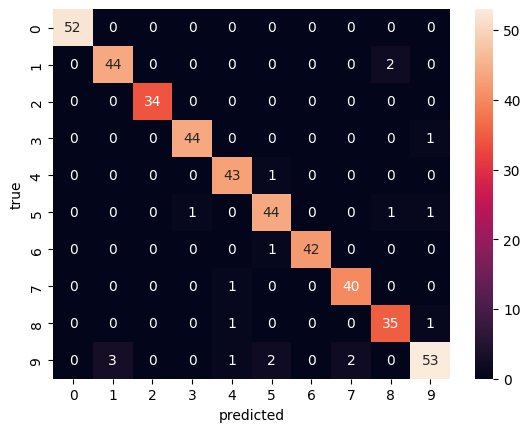

In [21]:
# seaborn 라이브러리 사용해서 confusion matrix를 heatmap으로 찍어보기
# 데이터 시각화 라이브러리 seaborn
import seaborn as sb

fig = sb.heatmap(confusion_mtx, annot=True, fmt=".0f")
fig.set_xlabel('predicted')
fig.set_ylabel('true')